# Circuit Diagram

In [1]:
%load_ext jupyter_tikz

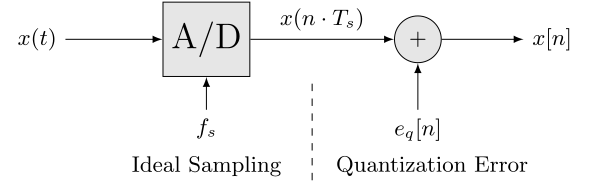

In [12]:
%%tikz -p=\include{prefix.tex} -sc=2.5 -S quantization_model.svg
\begin{tikzpicture}[auto, node distance=2cm]
    \node [input, name=input] {};
    \node [block, right of=input,yshift=0cm] (system){\Large A/D};
    \node [sum,right of=system, xshift=2cm] (sum){$+$};
    \node [input, below of=sum,yshift=1cm] (noise) {};
    \node [output, right of=sum, xshift=-0.5cm] (output) {};
    \node [input, below of=system, yshift=1cm] (fs){};
    
    \draw [-latex] (input) node[left]{$x(t)$}  -- (system);
    \draw [-latex] (system)  -- (sum) node[midway]{$\small x(n\cdot T_s$)};
    \draw [-latex] (sum)  -- (output) node[right]{$x[n]$};
    \draw [-latex] (noise) node[below]{$e_q[n]$} -- (sum);
    \draw [-latex] (fs) node[below]{$f_s$} -- (system);

    \draw [draw, dashed] (3.5, -2.0) -- (3.5, -.55);
    \node at (2, -1.8) {Ideal Sampling};
    \node at (5.2, -1.8) {Quantization Error};

\end{tikzpicture}


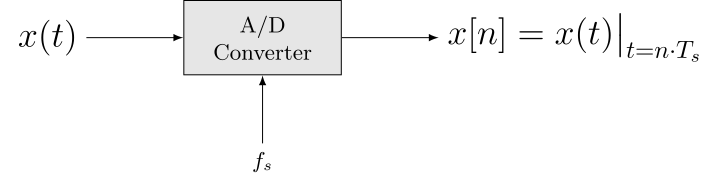

In [16]:
%%tikz -p=\include{prefix.tex} -sc=2.5 -S ideal_sampling.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
    \node[block, right of=in, text width=2cm, align=center](sys1){A/D \\ Converter};
	\node[output, right of=sys1] (out){};
    \node [input, below of=sys1, yshift=1cm] (fs){};
	
	% lines
	\draw[->] (in) node[left]{\Large $x(t)$}--(sys1) node[left]{};
   	\draw[->] (sys1) node[right]{}--(out) node[right]{\Large $x[n] = x(t)\big|_{t=n\cdot T_s}$};
    \draw [-latex] (fs) node[below]{$f_s$} -- (sys1);

\end{tikzpicture}

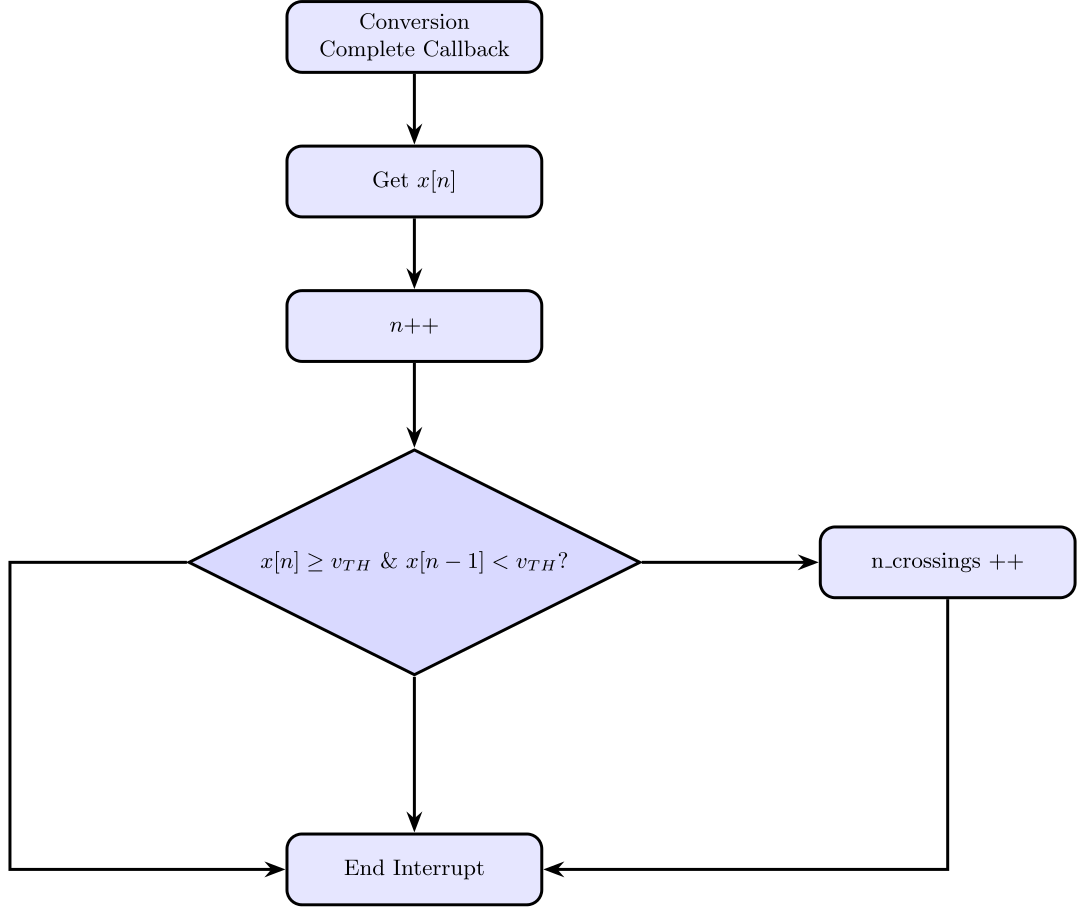

In [8]:
%%tikz -p=\include{prefix.tex} -sc=2.5 -S flowchart.svg
\begin{tikzpicture}[node distance=10mm and 20mm]
  % Nodes
  \node[block] (start) {Conversion\\Complete Callback};
  \node[block,below=of start] (getx) {Get $x[n]$};
  \node[block,below=of getx] (incn) {$n{+}{+}$};
  \node[decision,below=12mm of incn] (dec)
    {$x[n]\ge v_{TH}\ \&\ x[n-1]<v_{TH}$?};
  \node[block,right=25mm of dec] (incc) {$\text{n}\_{\text{crossings }}{+}{+}$};
  \node[block,below=22mm of dec] (end) {End Interrupt};

  % Main flow
  \draw[line] (start) -- (getx);
  \draw[line] (getx) -- (incn);
  \draw[line] (incn) -- (dec);

  % True branch
  \draw[line] (dec.east) -- (incc.west);
  \draw[line] (incc.south) |- (end.east);

  % False branch (left sweep into End)
  \coordinate (leftbend) at ([xshift=-25mm]dec.west);
  \draw[line] (dec.west) -- (leftbend) |- (end.west);

  % Down into End
  \draw[line] (dec.south) -- (end.north);
\end{tikzpicture}